In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("sales.csv")   # make sure file name matches

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()

Shape: (100, 14)

Columns:
 Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='str')


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [8]:
def format_currency(value):
    return f"${value:,.2f}"

In [5]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Ensure numeric columns
numeric_cols = [
    'Units Sold',
    'Unit Price',
    'Unit Cost',
    'Total Revenue',
    'Total Cost',
    'Total Profit'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check null values
print("\nNull values:\n")
print(df.isnull().sum())

# Drop nulls if any
df = df.dropna()

print("\nData cleaned successfully.")


Null values:

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Data cleaned successfully.


In [9]:
# Total Revenue
total_revenue = df['Total Revenue'].sum()

# Total Profit
total_profit = df['Total Profit'].sum()

# Most Profitable Region
most_profitable_region = (
    df.groupby('Region')['Total Profit']
    .sum()
    .idxmax()
)

# Most Profitable Item Type
most_profitable_item = (
    df.groupby('Item Type')['Total Profit']
    .sum()
    .idxmax()
)

# Sales by Channel
sales_by_channel = (
    df.groupby('Sales Channel')['Total Revenue']
    .sum()
)

# Top 5 Countries by Revenue
top_5_countries = (
    df.groupby('Country')['Total Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Average Profit per Order
avg_profit_per_order = df['Total Profit'].mean()

print("======== KEY BUSINESS INSIGHTS ========")
print(f"📌 Total Revenue Generated: {format_currency(total_revenue)}")
print(f"📌 Total Profit Generated: {format_currency(total_profit)}")
print(f"📌 Most Profitable Region: {most_profitable_region}")
print(f"📌 Most Profitable Item Type: {most_profitable_item}")
print(f"📌 Average Profit per Order: {format_currency(avg_profit_per_order)}")

======== KEY BUSINESS INSIGHTS ========
📌 Total Revenue Generated: $137,348,768.31
📌 Total Profit Generated: $44,168,198.40
📌 Most Profitable Region: Sub-Saharan Africa
📌 Most Profitable Item Type: Cosmetics
📌 Average Profit per Order: $441,681.98


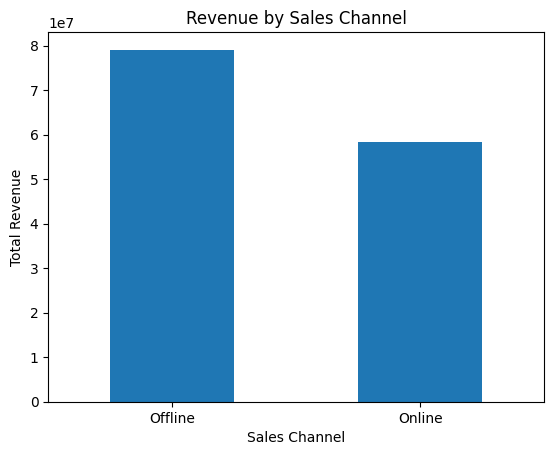

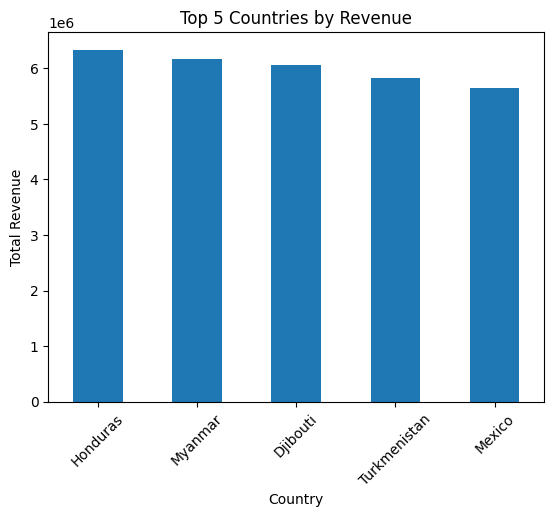

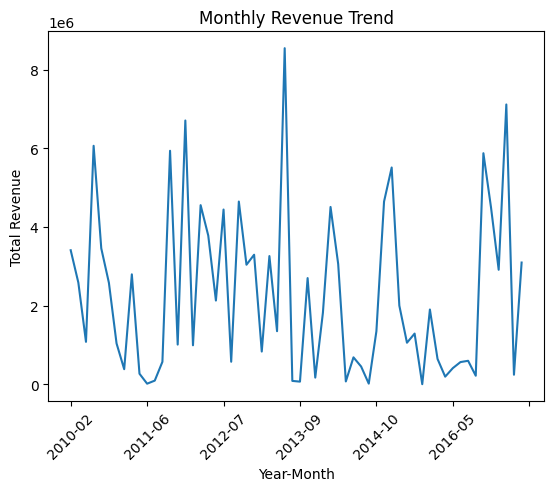

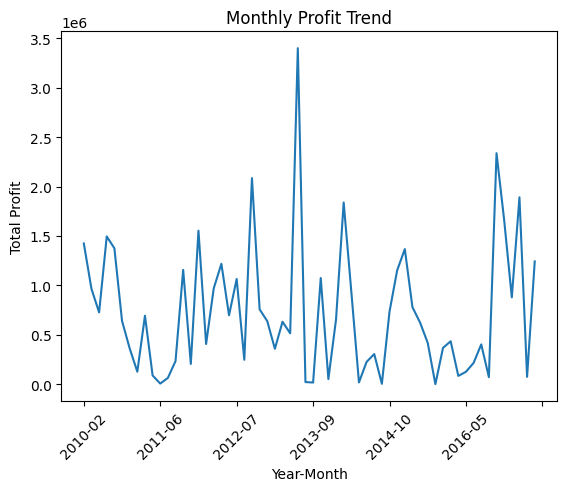

## 🛒 Sales Channel Performance

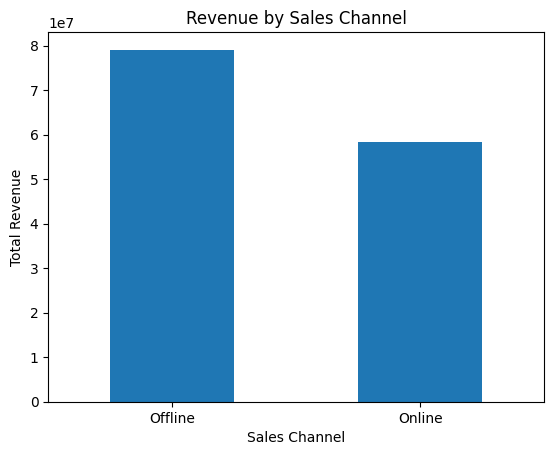

In [34]:
import matplotlib.pyplot as plt

# Sales by Channel Chart
sales_by_channel.plot(kind='bar')
plt.title("Revenue by Sales Channel")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

# Top 5 Countries Chart
top_5_countries.plot(kind='bar')
plt.title("Top 5 Countries by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Year-Month column
df['Year-Month'] = df['Order Date'].dt.to_period('M')

monthly_revenue = (
    df.groupby('Year-Month')['Total Revenue']
    .sum()
)

# Convert index to string for plotting
monthly_revenue.index = monthly_revenue.index.astype(str)

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Monthly Profit
monthly_profit = (
    df.groupby('Year-Month')['Total Profit']
    .sum()
)

monthly_profit.index = monthly_profit.index.astype(str)

plt.figure()
monthly_profit.plot()
plt.title("Monthly Profit Trend")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

# Sales Channel Performance
display(Markdown("## 🛒 Sales Channel Performance"))

plt.figure()
sales_by_channel.plot(kind='bar')
plt.title("Revenue by Sales Channel")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

In [35]:
# ----------------------------
# PREPARE BUSINESS METRICS
# ----------------------------

total_revenue = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
avg_profit = df['Total Profit'].mean()

# Revenue by channel
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()

offline_revenue = sales_by_channel.get('Offline', 0)
online_revenue = sales_by_channel.get('Online', 0)

if online_revenue != 0:
    revenue_diff_pct = ((offline_revenue - online_revenue) / online_revenue) * 100
else:
    revenue_diff_pct = 0

# Most profitable region
profit_by_region = df.groupby('Region')['Total Profit'].sum()
most_profitable_region = profit_by_region.idxmax()

# Most profitable item
profit_by_item = df.groupby('Item Type')['Total Profit'].sum()
most_profitable_item = profit_by_item.idxmax()

# Top 5 countries
top_5_countries = (
    df.groupby('Country')['Total Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# ----------------------------
# WRITE CLEAN REPORT
# ----------------------------

with open("report.txt", "w") as f:

    f.write("SALES PERFORMANCE ANALYSIS REPORT\n")
    f.write("=================================\n\n")

    f.write("EXECUTIVE SUMMARY\n")
    f.write("-----------------\n")
    f.write(f"Total Revenue Generated: ${total_revenue:,.2f}\n")
    f.write(f"Total Profit Generated: ${total_profit:,.2f}\n")
    f.write(f"Average Profit per Order: ${avg_profit:,.2f}\n\n")

    f.write("KEY BUSINESS INSIGHTS\n")
    f.write("---------------------\n")
    f.write(f"• Offline sales generated {abs(revenue_diff_pct):.1f}% more revenue than online sales.\n")
    f.write(f"• {most_profitable_item} emerged as the most profitable product category.\n")
    f.write(f"• {most_profitable_region} is the most profitable region overall.\n\n")

    f.write("REVENUE BY SALES CHANNEL\n")
    f.write("------------------------\n")
    f.write(f"Offline Revenue: ${offline_revenue:,.2f}\n")
    f.write(f"Online Revenue: ${online_revenue:,.2f}\n\n")

    f.write("TOP 5 COUNTRIES BY REVENUE\n")
    f.write("---------------------------\n")

    for country, revenue in top_5_countries.items():
        f.write(f"{country}: ${revenue:,.2f}\n")

print("Professional report saved as report.txt")

Professional report saved as report.txt


In [16]:
df['Profit Margin (%)'] = (df['Total Profit'] / df['Total Revenue']) * 100

avg_margin = df['Profit Margin (%)'].mean()

print("Average Profit Margin: {:.2f}%".format(avg_margin))

Average Profit Margin: 36.21%


In [17]:
top_profit_countries = (
    df.groupby('Country')['Total Profit']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Countries by Profit:\n")
print(top_profit_countries)

Top 5 Countries by Profit:

Country
Djibouti    2425317.87
Myanmar     1802771.70
Pakistan    1719922.04
Samoa       1678540.98
Honduras    1609947.52
Name: Total Profit, dtype: float64


In [18]:
from IPython.display import display, Markdown

display(Markdown("## 📊 Executive KPI Dashboard"))

display(Markdown(f"""
### 💰 Financial Overview
- **Total Revenue:** ${total_revenue:,.2f}
- **Total Profit:** ${total_profit:,.2f}
- **Average Profit per Order:** ${avg_profit_per_order:,.2f}

### 🏆 Performance Highlights
- **Most Profitable Region:** {most_profitable_region}
- **Most Profitable Item Type:** {most_profitable_item}
"""))

## 📊 Executive KPI Dashboard


### 💰 Financial Overview
- **Total Revenue:** $137,348,768.31
- **Total Profit:** $44,168,198.40
- **Average Profit per Order:** $441,681.98

### 🏆 Performance Highlights
- **Most Profitable Region:** Sub-Saharan Africa
- **Most Profitable Item Type:** Cosmetics


In [22]:
df = df.drop_duplicates()
df.to_csv("cleaned_data.csv", index=False)